<h1><center>COVID-19 SENTIMENT ANALYSIS</center></h1>

<h1><center>Visualization dashboard</center></h1>

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('dark_background')

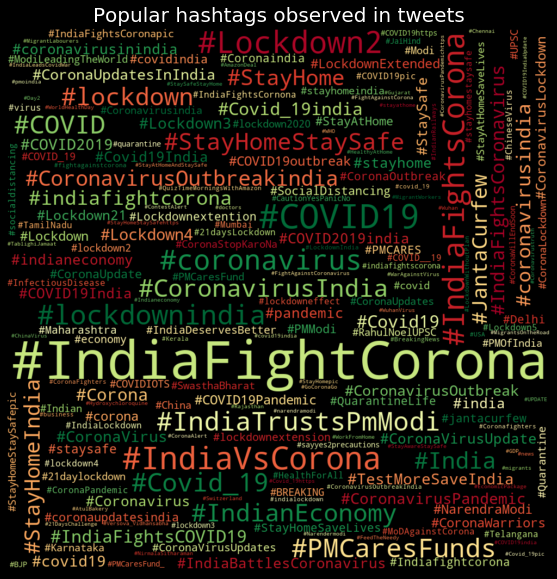

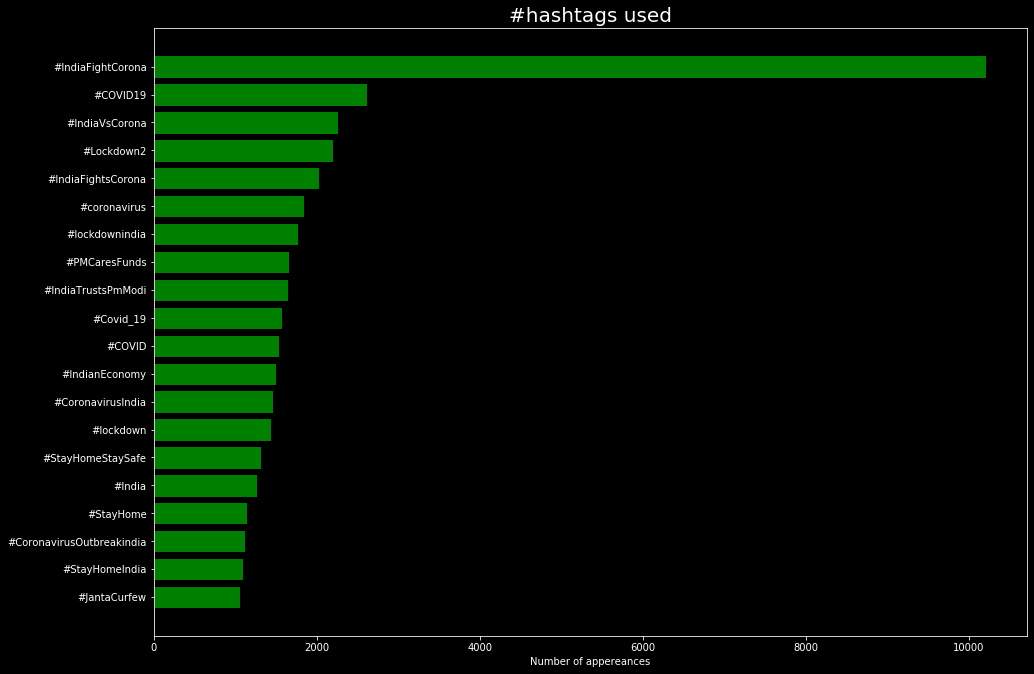

In [3]:
#hashtags visualization
df = pd.read_csv('hashtags.csv',encoding='ISO-8859-1')
#to analyze the hashtags used
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-z0-9]+")
hashtag_matches = list(df['Hashtags'].apply(hashtag_pattern.findall))

hashtag_dict = {}
for match in hashtag_matches:
    for onematch in match:
        if onematch not in hashtag_dict.keys():
            hashtag_dict[onematch]= 1
        else:
            hashtag_dict[onematch] += 1

#making a list of used hashtags and their values
hashtag_ordered_list = sorted(hashtag_dict.items(),key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]

hashtag_ordered_values = []
hashtag_ordered_keys = []
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])
    
#making a wordcloud of the hashtags used
hashtag_ordered_dict = {}
for item in hashtag_ordered_list:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'black',colormap='RdYlGn').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Popular hashtags observed in tweets',fontsize=20)

plt.show()

#Plotting a graph of popular hashtags with the used hashtags
fig, ax = plt.subplots(figsize = (15,10))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Number of appereances")
ax.set_title("#hashtags used", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()



## Visualizing sentiment scores using VADER Sentiment Analyzer

In [4]:
data = pd.read_csv('vaderdataviz.csv',encoding='ISO-8859-1')

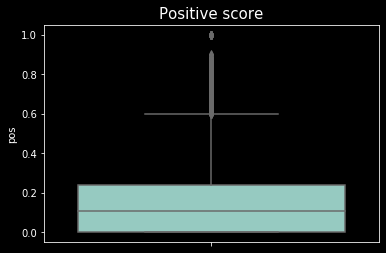

In [5]:
plt.title("Positive score",fontsize=15)
sns.boxplot(y='pos',data=data);

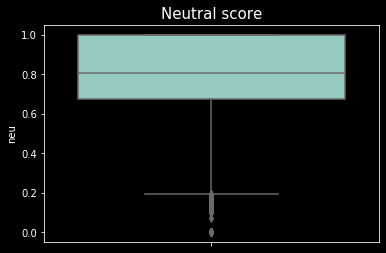

In [6]:
plt.title("Neutral score",fontsize=15)
sns.boxplot(y='neu',data=data);

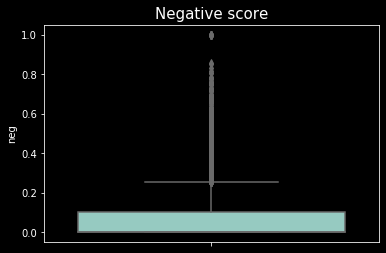

In [7]:
plt.title("Negative score",fontsize=15)
sns.boxplot(y='neg',data=data);

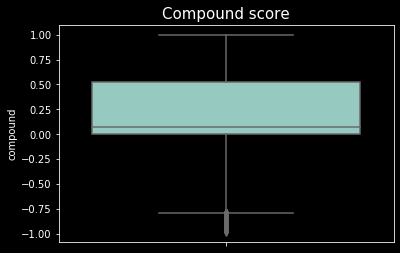

In [8]:
plt.title("Compound score",fontsize=15)
sns.boxplot(y='compound',data=data);

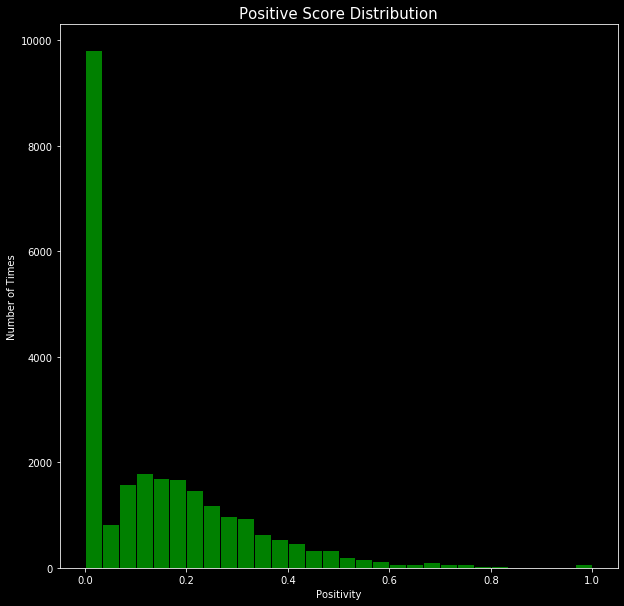

In [9]:
plt.figure(figsize=(10,10))
plt.hist(data['pos'],color='green',edgecolor='black',density=False,bins=30)
plt.title("Positive Score Distribution",fontsize=15)
plt.xlabel("Positivity")
plt.ylabel("Number of Times");

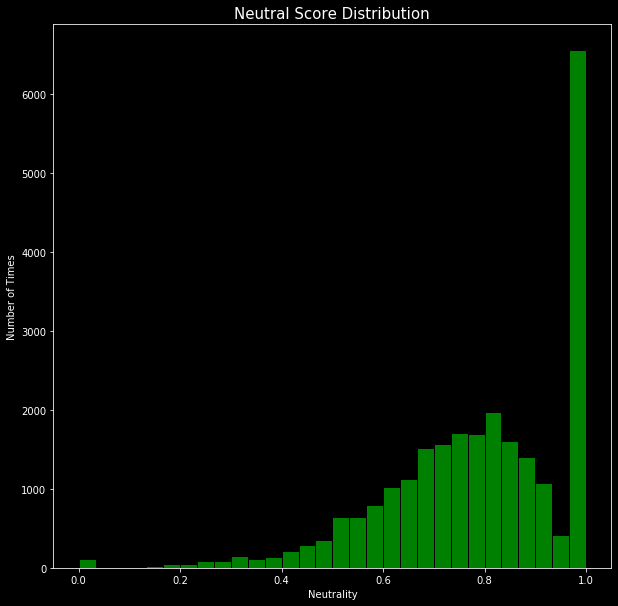

In [10]:
plt.figure(figsize=(10,10))
plt.hist(data['neu'],color='green',edgecolor='black',density=False,bins=30)
plt.title("Neutral Score Distribution",fontsize=15)
plt.xlabel("Neutrality")
plt.ylabel("Number of Times");

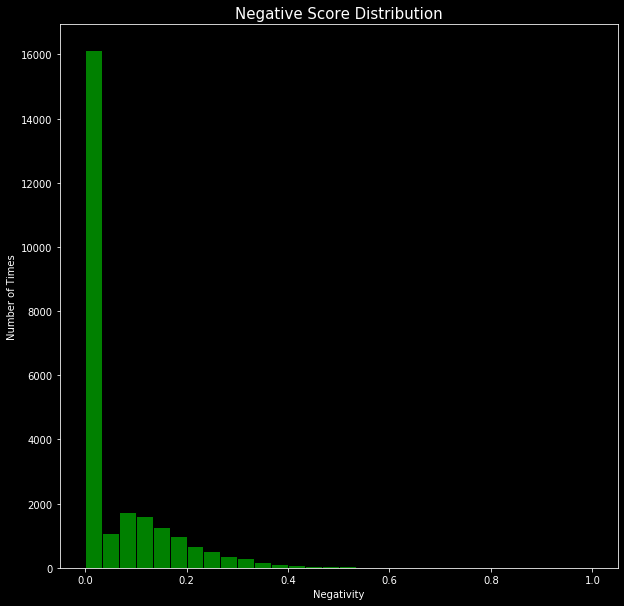

In [11]:
plt.figure(figsize=(10,10))
plt.hist(data['neg'],color='green',edgecolor='black',density=False,bins=30)
plt.title("Negative Score Distribution",fontsize=15)
plt.xlabel("Negativity")
plt.ylabel("Number of Times");

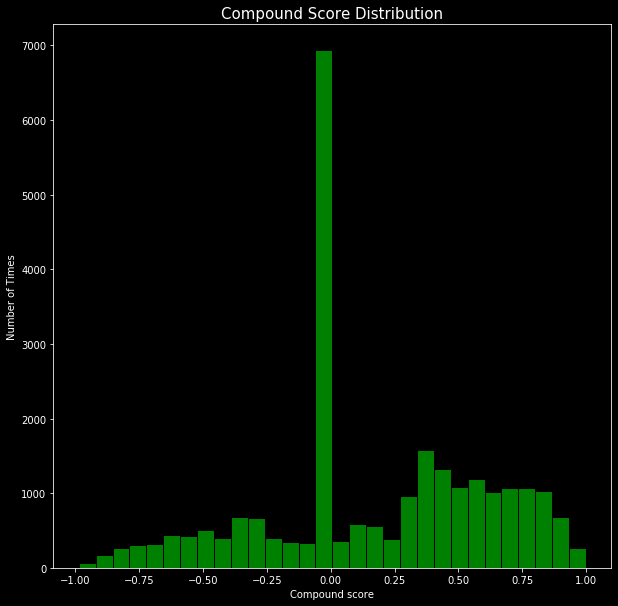

In [12]:
plt.figure(figsize=(10,10))
plt.hist(data['compound'],color='green',edgecolor='black',density=False,bins=30)
plt.title("Compound Score Distribution",fontsize=15)
plt.xlabel("Compound score")
plt.ylabel("Number of Times");

**The compound score obtained using VADER sentiment analysis was used to categorize the tweets into 3 classes:<br>1.Positive(1) - compound score greater than 0.5<br>2.Neutral(0) - compound score between -0.5 to 0.5<br>3.Negative(-1) - compound score less than -0.5<br>This way the class distribution is obtained as follows:**

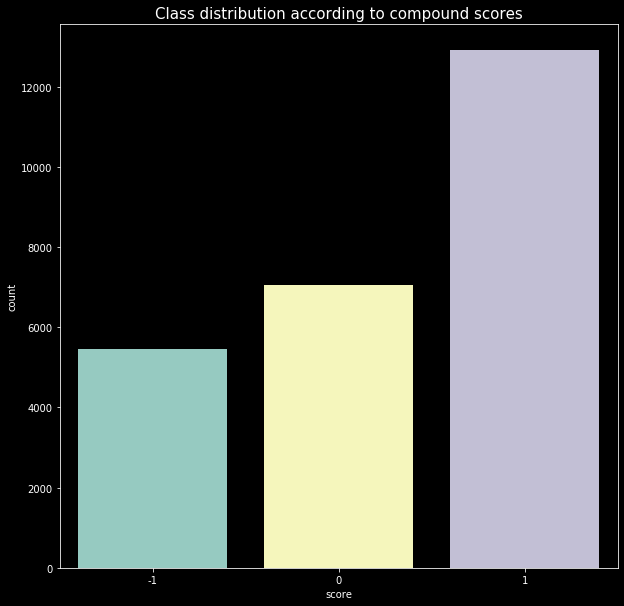

In [13]:
plt.figure(figsize=(10,10))
plt.title("Class distribution according to compound scores",fontsize=15)
sns.countplot(x='score',data=data)
plt.show()

*-1 - negative*<br/>
*0 - neutral*<br/>
*1 - positive*

## Visualization of sentiment scores obtained using Textblob

In [14]:
dfm = pd.read_csv('dataviz.csv')

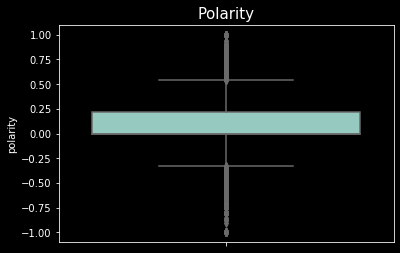

In [15]:
plt.title("Polarity",fontsize=15)
sns.boxplot(y='polarity',data=dfm);

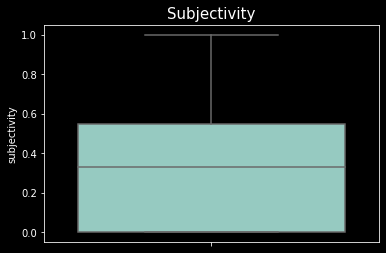

In [16]:
plt.title("Subjectivity",fontsize=15)
sns.boxplot(y='subjectivity',data=dfm);

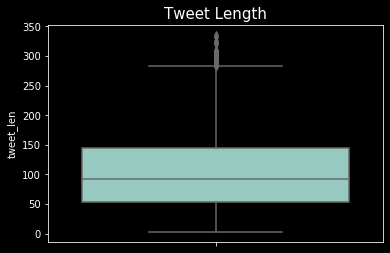

In [17]:
plt.title("Tweet Length",fontsize=15)
sns.boxplot(y='tweet_len',data=dfm);

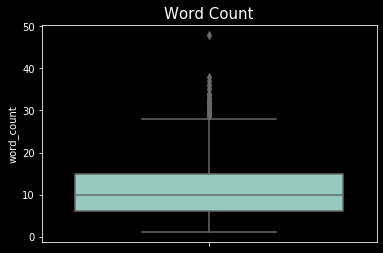

In [18]:
plt.title("Word Count",fontsize=15)
sns.boxplot(y='word_count',data=dfm);

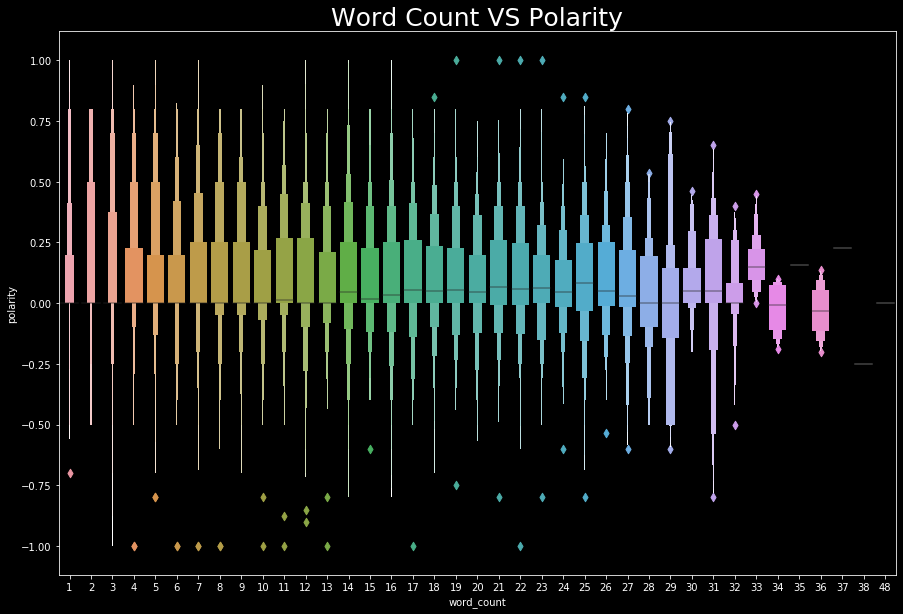

In [19]:
plt.figure(figsize=(15,10))
plt.title("Word Count VS Polarity",fontsize=25)
sns.boxenplot(x='word_count', y='polarity', data=dfm)
plt.show()

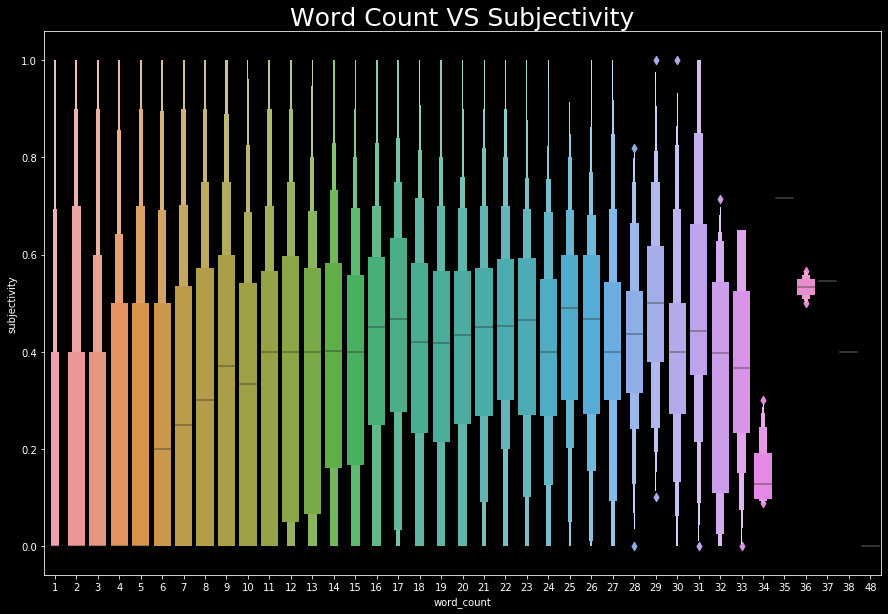

In [20]:
plt.figure(figsize=(15,10))
plt.title("Word Count VS Subjectivity",fontsize=25)
sns.boxenplot(x='word_count', y='subjectivity', data=dfm)
plt.show()

Pearson's correlation: -0.01014


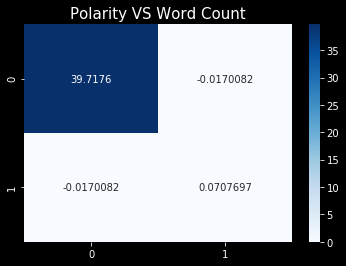

In [21]:
from numpy import cov
from scipy.stats import pearsonr


d1=dfm['word_count']
d2=dfm['polarity']

covariance = cov(d1,d2)
plt.title("Polarity VS Word Count",fontsize=15)
sns.heatmap(covariance,annot=True,fmt='g',cmap='Blues')
corr,_ = pearsonr(d1,d2)
print("Pearson's correlation: %.5f" %corr)



**It is seen that there is a slight negative correlation between word count and polarity.**

Pearson's correlation: 0.24379


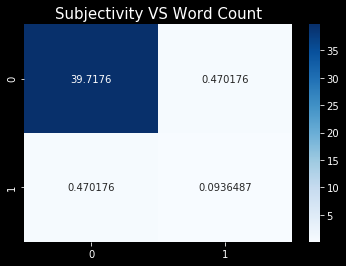

In [22]:
d1=dfm['word_count']
d2=dfm['subjectivity']

covariance = cov(d1,d2)
plt.title("Subjectivity VS Word Count",fontsize=15)
sns.heatmap(covariance,annot=True,fmt='g',cmap='Blues')
corr,_ = pearsonr(d1,d2)
print("Pearson's correlation: %.5f" %corr)


**There is a positive correlation between subjectivity and word count,indicating that as the word count increases the tweet is more subjective**

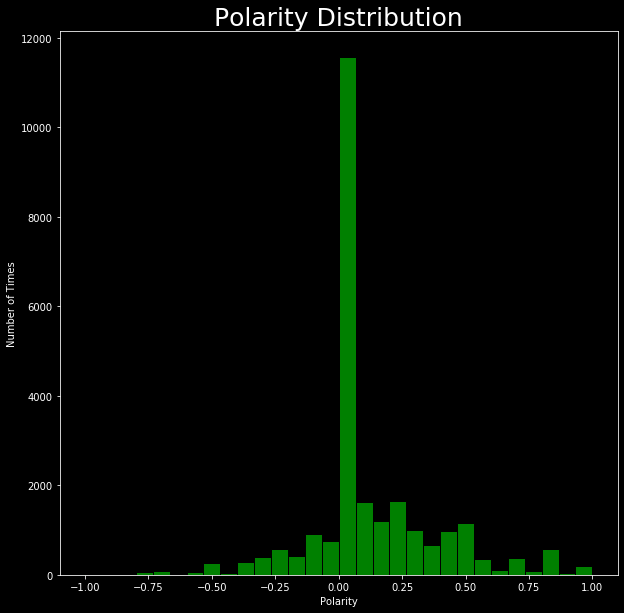

In [23]:
plt.figure(figsize=(10,10))
plt.hist(dfm['polarity'],color='green',edgecolor='black',density=False,bins=30)
plt.title("Polarity Distribution",fontsize=25)
plt.xlabel("Polarity")
plt.ylabel("Number of Times");

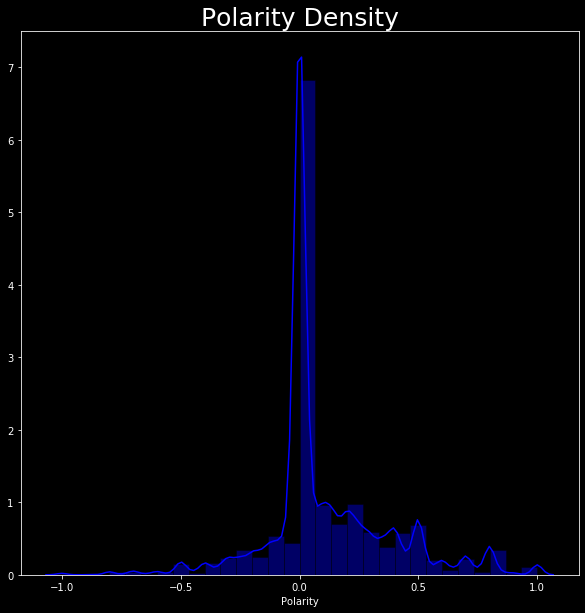

In [24]:
plt.figure(figsize=(10,10))
sns.distplot(dfm['polarity'], hist=True, kde=True, 
             bins=int(30), color = 'blue',
             hist_kws={'edgecolor':'black'},axlabel ='Polarity')
plt.title('Polarity Density',size=25);

**It is seen that the tweets are mostly neutral in nature. An indicator of neutral rection towards the situtation**

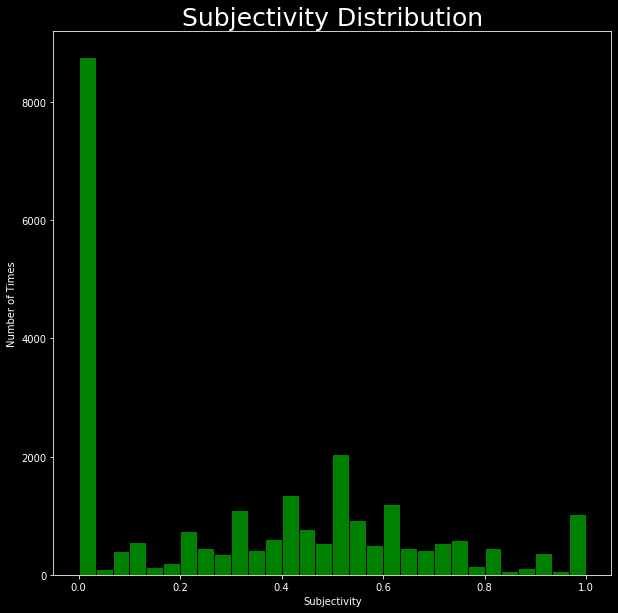

In [25]:
plt.figure(figsize=(10,10))
plt.hist(dfm['subjectivity'],color='green',edgecolor='black',density=False,bins=30)
plt.title("Subjectivity Distribution",fontsize=25)
plt.xlabel("Subjectivity")
plt.ylabel("Number of Times");

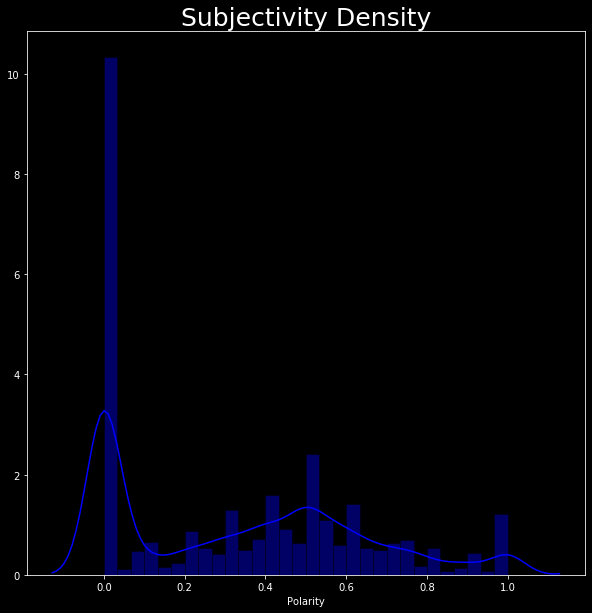

In [26]:
plt.figure(figsize=(10,10))
sns.distplot(dfm['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'blue',
             hist_kws={'edgecolor':'black'},axlabel ='Polarity')
plt.title('Subjectivity Density',fontsize=25);

**It is seen that most tweets are objective in nature**

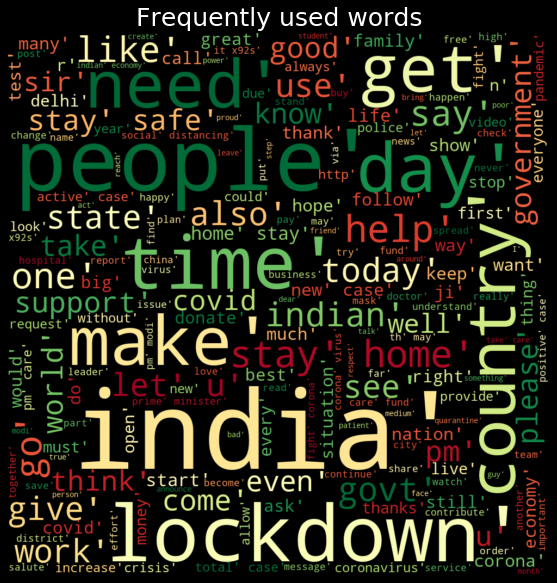

In [27]:
from wordcloud import WordCloud
import random

wordcloud = WordCloud(max_font_size=200,random_state=21, width=1000, height=1000,
                      background_color="black",colormap='RdYlGn').generate(' '.join(dfm['lemmatized']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Frequently used words",fontsize=25)
plt.show();

## Accuracy scores of classification algorithms on tweets

The feature extraction was done using CountVectorizer and TfidfVectorizer.<br>Classification algorithms used were:<br>- Naive Bayes (MultinomialNB)<br>- Logistic Regression (paired with both CountVectorizer and TfidfVectorizer)<br>- Linear Support Vector Machine (paired with both CountVectorizer and TfidfVectorizer)





**CountVectorizer with Multinomial Naive Bayes**

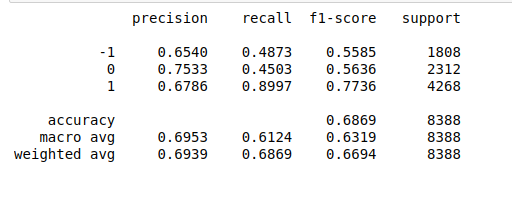



**TfidfVectorizer with Logistic Regression**

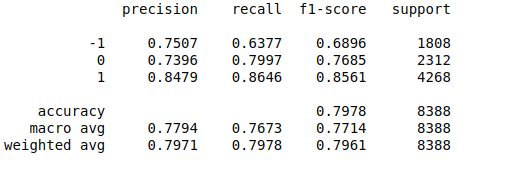



**CountVectorizer with Logistic Regression**

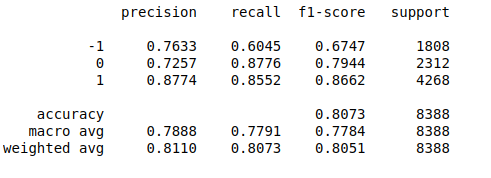



**TfidfVectorizer with SVM**

*Accuracy using different values of c*

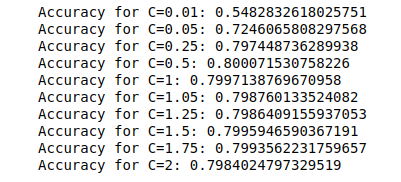

*Final report*

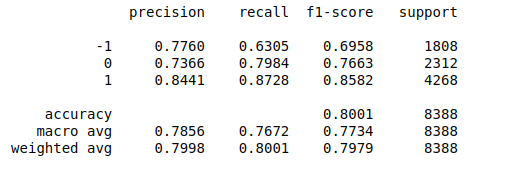



**CountVectorizer with SVM**

*Accuracy using different values of c*

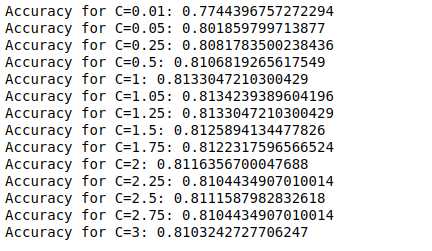

*Final report*

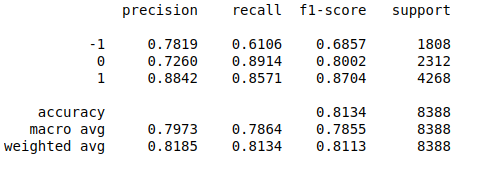

**After applying the classification algorithms, we can see that the accuracy score is the highest for Linear SVM with CountVectorizer and hence is suitable for the acquired data.**